In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_excel("/Users/claudio/Downloads/3. 159_Datos_Sondeo_Rapido_Lima_2022_01_31 rev24Feb22.xlsx", sheet_name='Versión Final_ VECINDARIOS rev2')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 132 entries, start to _index
dtypes: datetime64[ns](4), float64(47), int64(3), object(78)
memory usage: 164.1+ KB


In [4]:
df.select_dtypes('datetime')

,start,end,1.2. Fecha de la Encuesta,_submission_time
0,2021-12-10 22:22:22.154,2021-12-10 22:54:48.808,2021-12-04,2021-12-11 03:55:50
1,2021-12-10 22:55:23.087,2021-12-10 23:05:43.602,2021-12-04,2021-12-11 04:05:55
2,2021-12-10 23:05:43.746,2021-12-10 23:11:27.535,2021-12-04,2021-12-11 04:11:38
3,2021-12-10 23:11:27.613,2021-12-10 23:20:18.281,2021-12-04,2021-12-11 04:20:21
4,2021-12-10 23:20:18.430,2021-12-10 23:28:47.308,2021-12-04,2021-12-11 04:28:58
...,...,...,...,...
154,2022-01-27 16:38:03.398,2022-01-27 16:56:38.042,2021-12-11,2022-01-27 21:56:48
155,2022-01-27 16:56:38.121,2022-01-27 17:02:23.123,2021-12-11,2022-01-27 22:02:33
156,2022-01-27 17:02:23.201,2022-01-27 17:10:26.181,2021-12-11,2022-01-27 22:10:36
157,2022-01-27 15:58:54.021,2022-01-27 17:15:58.647,2021-12-04,2022-01-27 22:15:56


In [5]:
df.select_dtypes('int64')

,3.3. ¿Cuál es su principal actividad laboral actual?.1,_id,_index
0,15,129245760,1
1,15,129246411,2
2,22,129246765,3
3,15,129247091,4
4,15,129247517,5
...,...,...,...
154,15,138384836,155
155,15,138385345,156
156,15,138386314,157
157,6,138386944,158


In [6]:
df.select_dtypes('float')

,Número del Cuestionário,3.2. ¿Cuál es su edad?,3.3. ¿Cuál es su principal actividad laboral actual?.2,"4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2019, antes de la pandemia**.1","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2019, antes de la pandemia**.2","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2019, antes de la pandemia**.3","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2020, con la pandemia**.1","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2020, con la pandemia**.2","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2020, con la pandemia**.3","4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2021, en la actualidad**.1",...,"8.2. ¿Normalmente, quién prepara los alimentos que se compran en el hogar?.3",8.2.1. ¿Podría mencionar por qué?.1,8.2.1. ¿Podría mencionar por qué?.2,_9. Registra la ubicación del hogar de la encuesta._latitude,_9. Registra la ubicación del hogar de la encuesta._longitude,_9. Registra la ubicación del hogar de la encuesta._altitude,_9. Registra la ubicación del hogar de la encuesta._precision,_validation_status,_notes,_tags
0,1.0,47.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,2.0,NaN,-12.192973,-76.952371,0.0,7004.602701,NaN,NaN,NaN
1,2.0,31.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,72.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,1.0,NaN,-12.192973,-76.952371,0.0,7004.602701,NaN,NaN,NaN
3,4.0,48.0,NaN,1.0,10.0,NaN,1.0,NaN,NaN,1.0,...,NaN,1.0,3.0,-12.237912,-76.921612,0.0,15.388000,NaN,NaN,NaN
4,5.0,51.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,1.0,NaN,-12.192973,-76.952371,0.0,7004.602701,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,5.0,40.0,NaN,38.0,NaN,NaN,38.0,NaN,NaN,38.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,6.0,60.0,NaN,15.0,NaN,NaN,15.0,NaN,NaN,15.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,7.0,61.0,NaN,39.0,NaN,NaN,39.0,NaN,NaN,39.0,...,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,4.0,69.0,NaN,1.0,14.0,2.0,1.0,14.0,2.0,1.0,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sel_vars = pd.read_excel("/Users/claudio/Downloads/3. 159_Datos_Sondeo_Rapido_Lima_2022_01_31 rev24Feb22.xlsx", 
                         sheet_name='Variables_seleccionadas', header=None)

In [8]:
selected_varnames = sel_vars.dropna().drop_duplicates(keep='first').values.flatten().tolist()

In [9]:
colname_mapper = {'3.1. Sexo': 'sexo',
 '3.2. ¿Cuál es su edad?': 'edad',
 '3.3. ¿Cuál es su principal actividad laboral actual?': 'principal_actividad_laboral',
 '3.4. ¿Cuál es su situación laboral actual?': 'situacion_laboral_actual',
 '4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2019, antes de la pandemia**': 'lugar_compra_alimentos_2019',
 '4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2020, con la pandemia**': 'lugar_compra_alimentos_2020',
 '4.1. ¿Podría decirnos dónde compraba/compra la mayor parte de sus alimentos?\n**En 2021, en la actualidad**': 'lugar_compra_alimentos_2021',
 '4.2. SI CAMBIÓ DE LUGAR EN EL AÑO 2020 ¿Cuál fue la razón principal del cambio?': 'motivo_cambio_2020',
 '4.3. SI CAMBIÓ DE LUGAR EN EL AÑO 2021 ¿Cuál fue la razón principal del cambio? ': 'motivo_cambio_2021',
 '4.4. ¿Cada cuánto tiempo sale a comprar alimentos para su hogar?\n**En 2019, antes de la pandemia**': 'frecuencia_compra_alimentos_2019',
 '4.4. ¿Cada cuánto tiempo sale a comprar alimentos para su hogar?\n**En 2020, con la pandemia**': 'frecuencia_compra_alimentos_2020',
 '4.4. ¿Cada cuánto tiempo sale a comprar alimentos para su hogar?\n**En 2021, en la actualidad**': 'frecuencia_compra_alimentos_2021',
 '4.5. ¿Qué alimentos son los que más compra regularmente?': 'alimentos_mas_comprados',
 '5.1 ¿Usted ha tenido dificultades económicas para adquirir sus alimentos?\n**En 2019, antes de la pandemia**': 'dificultad_economica_alimentos_binario_2019',
 '5.1 ¿Usted ha tenido dificultades económicas para adquirir sus alimentos?\n**En 2020, con la pandemia**': 'dificultad_economica_alimentos_binario_2020',
 '5.1 ¿Usted ha tenido dificultades económicas para adquirir sus alimentos?\n**En 2021, en la actualidad**': 'dificultad_economica_alimentos_binario_2021',
 '5.1.1 ¿Qué hizo para superar las dificultades económicas que menciona?\n**En 2019, antes de la pandemia **': 'respuesta_dificultad_economica_2019',
 '5.1.1 ¿Qué hizo para superar las dificultades económicas que menciona?\n**En 2020, con la pandemia**': 'respuesta_dificultad_economica_2020',
 '5.1.1 ¿Qué hizo para superar las dificultades económicas que menciona?\n**En 2021, en la actualidad**': 'respuesta_dificultad_economica_2021',
 '5.2 ¿Usted ha tenido otro tipo de dificultades para adquirir sus alimentos (falta internet, no podía moverse)?\n**En 2019, antes de la pandemia**': 'otras_dificultades_binario_2019',
 '5.2 ¿Usted ha tenido otro tipo de dificultades para adquirir sus alimentos (falta internet, no podía moverse)?\n**En 2020, con la pandemia**': 'otras_dificultades_binario_2020',
 '5.2 ¿Usted ha tenido otro tipo de dificultades para adquirir sus alimentos (falta internet, no podía moverse)?\n**En 2021, en la actualidad**': 'otras_dificultades_binario_2021',
 '5.2.1 ¿Cuáles otras dificultades han tenido?\n**En 2019, antes de la pandemia**': 'otras_dificultades_2019',
 '5.2.1 ¿Cuáles otras dificultades han tenido?\n**En 2020, con la pandemia**': 'otras_dificultades_2020',
 '5.2.1 ¿Cuáles otras dificultades han tenido?\n**En 2021, en la actualidad **': 'otras_dificultades_2021',
 '5.2.2. ¿Qué hizo para superar las dificultades que menciona?\n**En 2019, antes de la pandemia**': 'respuesta_otras_dificultades_2019',
 '5.2.2. ¿Qué hizo para superar las dificultades que menciona?\n**En 2020, con la pandemia**': 'respuesta_otras_dificultades_2020',
 '5.2.2. ¿Qué hizo para superar las dificultades que menciona?\n**En 2021, en la actualidad**': 'respuesta_otras_dificultades_2021',
 '5.3. ¿Su hogar recibió algún tipo de ayuda en alimentos, en dinero u otros?\n**En 2019, antes de la pandemia**': 'recibio_ayuda_binario_2019',
 '5.3. ¿Su hogar recibió algún tipo de ayuda en alimentos, en dinero u otros?\n**En 2020, con la pandemia**': 'recibio_ayuda_binario_2020',
 '5.3. ¿Su hogar recibió algún tipo de ayuda en alimentos, en dinero u otros?\n**En 2021, en la actualidad**': 'recibio_ayuda_binario_2021',
 '5.3.1 ¿Podría indicarnos qué tipo de ayuda recibió (dinero, alimentos, comidas preparadas)?\n**En 2019, antes de la pandemia**': 'tipo_ayuda_2019',
 '5.3.1 ¿Podría indicarnos qué tipo de ayuda recibió (dinero, alimentos, comidas preparadas)?\n**En 2020, con la pandemia**': 'tipo_ayuda_2020',
 '5.3.1 ¿Podría indicarnos qué tipo de ayuda recibió (dinero, alimentos, comidas preparadas)?\n**En 2021, en la actualidad**': 'tipo_ayuda_2021',
 '5.3.2. ¿Podría indicarnos quién o quiénes lo ayudaron?\n**En 2019, antes de la pandemia**': 'quien_ayudo_2019',
 '5.3.2. ¿Podría indicarnos quién o quiénes lo ayudaron?\n**En 2020, con la pandemia**': 'quien_ayudo_2020',
 '5.3.2. ¿Podría indicarnos quién o quiénes lo ayudaron?\n**En 2021, en la actualidad**': 'quien_ayudo_2021',
 '6.1. ¿Podría indicarnos donde come normalmente?\n**En 2019, antes de la pandemia**': 'lugar_comida_regular_2019',
 '6.1. ¿Podría indicarnos donde come normalmente?\n**En 2020, con la pandemia**': 'lugar_comida_regular_2020',
 '6.1. ¿Podría indicarnos donde come normalmente?\n**En 2021, en la actualidad**': 'lugar_comida_regular_2021',
 'Por qué come normalmente en estos lugares?\nEn 2019, antes de la pandemia': 'motivo_lugar_comida_regular_2019',
 'Por qué come normalmente en estos lugares?\nEn 2020, con la pandemia': 'motivo_lugar_comida_regular_2020',
 'Por qué come normalmente en estos lugares?\nEn 2021, en la actualidad': 'motivo_lugar_comida_regular_2021',
 '7.1. ¿Usted consume productos ecológicos/orgánicos?\n**En 2019, antes de la pandemia**': 'consume_productos_ecologicos_2019',
 '7.1. ¿Usted consume productos ecológicos/orgánicos?\n**En 2020, con la pandemia**': 'consume_productos_ecologicos_2020',
 '7.1. ¿Usted consume productos ecológicos/orgánicos?\n**En 2021, en la actualidad**': 'consume_productos_ecologicos_2021',
 '7.2. En la actualidad ¿Podría indicarnos por qué motivos NO consume productos ecológicos/orgánicos?': 'motivo_no_consume_productos_ecologicos',
 '7.2. En la actualidad ¿Podría indicarnos por qué motivos consume productos ecológicos/ orgánicos?': 'motivo_si_consume_productos_ecologicos',
 '7.3. En la actualidad, para usted los productos ecológicos/orgánicos son:': 'definicion_productos_ecologicos',
 '7.4. En la actualidad ¿Cuáles son los principales productos ecológicos/ orgánicos que consume? ': 'productos_ecologicos_consumidos',
 '7.5. En la actualidad ¿Dónde los compra?': 'lugar_compra_productos_ecologicos',
 '8.1. ¿Normalmente quién decide qué alimentos se compran en el hogar? ': 'decisor_compra_alimentos',
 '8.1.1. ¿Podría mencionar por qué?': 'motivo_decisor_compra_alimentos',
 '8.2. ¿Normalmente, quién prepara los alimentos que se compran en el hogar?': 'persona_que_prepara_alimentos',
 '8.2.1. ¿Podría mencionar por qué?': 'motivo_persona_que_prepara_alimentos'}

In [10]:
new_df = df[selected_varnames].rename(columns=colname_mapper)

In [11]:
new_df.shape

(159, 55)

In [12]:
new_df.columns

Index(['sexo', 'edad', 'principal_actividad_laboral',
       'situacion_laboral_actual', 'lugar_compra_alimentos_2019',
       'lugar_compra_alimentos_2020', 'lugar_compra_alimentos_2021',
       'motivo_cambio_2020', 'motivo_cambio_2021',
       'frecuencia_compra_alimentos_2019', 'frecuencia_compra_alimentos_2020',
       'frecuencia_compra_alimentos_2021', 'alimentos_mas_comprados',
       'dificultad_economica_alimentos_binario_2019',
       'dificultad_economica_alimentos_binario_2020',
       'dificultad_economica_alimentos_binario_2021',
       'respuesta_dificultad_economica_2019',
       'respuesta_dificultad_economica_2020',
       'respuesta_dificultad_economica_2021',
       'otras_dificultades_binario_2019', 'otras_dificultades_binario_2020',
       'otras_dificultades_binario_2021', 'otras_dificultades_2019',
       'otras_dificultades_2020', 'otras_dificultades_2021',
       'respuesta_otras_dificultades_2019',
       'respuesta_otras_dificultades_2020',
       'respuest

In [13]:
missings_report = pd.DataFrame([(col, new_df[col].isna().sum(), new_df[col].isna().sum()/new_df.shape[0]) for col in new_df.columns], columns=['name', 'nan_count', 'nan_%'])
missings_report = missings_report.sort_values('nan_count')
missings_report


,name,nan_count,nan_%
0,sexo,0,0.000000
29,recibio_ayuda_binario_2020,1,0.006289
30,recibio_ayuda_binario_2021,1,0.006289
37,lugar_comida_regular_2019,1,0.006289
38,lugar_comida_regular_2020,1,0.006289
21,otras_dificultades_binario_2021,1,0.006289
20,otras_dificultades_binario_2020,1,0.006289
19,otras_dificultades_binario_2019,1,0.006289
39,lugar_comida_regular_2021,1,0.006289
43,consume_productos_ecologicos_2019,1,0.006289


In [60]:
unique_report = pd.DataFrame([(invert_colnames_mapper[col], col, len(new_df[col].unique())) for col in new_df.columns], columns=['pregunta', 'codigo', '#_respuestas_unicas'])
unique_report = unique_report.sort_values('#_respuestas_unicas')
unique_report[unique_report['#_respuestas_unicas'] > 4].to_excel('outputs/reporte_respuestas_unicas.xlsx', index=False)
unique_report

,pregunta,codigo,#_respuestas_unicas
0,3.1. Sexo,sexo,2
21,5.2 ¿Usted ha tenido otro tipo de dificultades...,otras_dificultades_binario_2021,3
15,5.1 ¿Usted ha tenido dificultades económicas p...,dificultad_economica_alimentos_binario_2021,3
14,5.1 ¿Usted ha tenido dificultades económicas p...,dificultad_economica_alimentos_binario_2020,3
13,5.1 ¿Usted ha tenido dificultades económicas p...,dificultad_economica_alimentos_binario_2019,3
28,5.3. ¿Su hogar recibió algún tipo de ayuda en ...,recibio_ayuda_binario_2019,3
20,5.2 ¿Usted ha tenido otro tipo de dificultades...,otras_dificultades_binario_2020,3
30,5.3. ¿Su hogar recibió algún tipo de ayuda en ...,recibio_ayuda_binario_2021,3
29,5.3. ¿Su hogar recibió algún tipo de ayuda en ...,recibio_ayuda_binario_2020,3
43,7.1. ¿Usted consume productos ecológicos/orgán...,consume_productos_ecologicos_2019,3


In [15]:
invert_colnames_mapper = {v: k for k, v in colname_mapper.items()}

In [16]:
unique_report[unique_report['unique_count'] <= 4]['name'].tolist()

['sexo',
 'otras_dificultades_binario_2021',
 'dificultad_economica_alimentos_binario_2021',
 'dificultad_economica_alimentos_binario_2020',
 'dificultad_economica_alimentos_binario_2019',
 'recibio_ayuda_binario_2019',
 'otras_dificultades_binario_2020',
 'recibio_ayuda_binario_2021',
 'recibio_ayuda_binario_2020',
 'consume_productos_ecologicos_2019',
 'consume_productos_ecologicos_2020',
 'consume_productos_ecologicos_2021',
 'definicion_productos_ecologicos',
 'otras_dificultades_binario_2019']

In [17]:
new_df['consume_productos_ecologicos_2021'].unique()

array(['No', 'Sí', 'NS/NC', nan], dtype=object)

In [18]:
binarias = ['otras_dificultades_binario_2021',
            'dificultad_economica_alimentos_binario_2021',
            'dificultad_economica_alimentos_binario_2020',
            'dificultad_economica_alimentos_binario_2019',
            'recibio_ayuda_binario_2019',
            'otras_dificultades_binario_2020',
            'recibio_ayuda_binario_2021',
            'recibio_ayuda_binario_2020',
            'consume_productos_ecologicos_2019',
            'consume_productos_ecologicos_2020',
            'consume_productos_ecologicos_2021',
            'otras_dificultades_binario_2019']

In [19]:
binarias.sort()

In [20]:
for col in binarias:
    new_df[col] = new_df[col].fillna('NS/NC')

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
binarias

['consume_productos_ecologicos_2019',
 'consume_productos_ecologicos_2020',
 'consume_productos_ecologicos_2021',
 'dificultad_economica_alimentos_binario_2019',
 'dificultad_economica_alimentos_binario_2020',
 'dificultad_economica_alimentos_binario_2021',
 'otras_dificultades_binario_2019',
 'otras_dificultades_binario_2020',
 'otras_dificultades_binario_2021',
 'recibio_ayuda_binario_2019',
 'recibio_ayuda_binario_2020',
 'recibio_ayuda_binario_2021']

In [24]:
np.array(binarias).reshape(4,3)

array([['consume_productos_ecologicos_2019',
        'consume_productos_ecologicos_2020',
        'consume_productos_ecologicos_2021'],
       ['dificultad_economica_alimentos_binario_2019',
        'dificultad_economica_alimentos_binario_2020',
        'dificultad_economica_alimentos_binario_2021'],
       ['otras_dificultades_binario_2019',
        'otras_dificultades_binario_2020',
        'otras_dificultades_binario_2021'],
       ['recibio_ayuda_binario_2019', 'recibio_ayuda_binario_2020',
        'recibio_ayuda_binario_2021']], dtype='<U43')

'consume_productos_ecologicos'

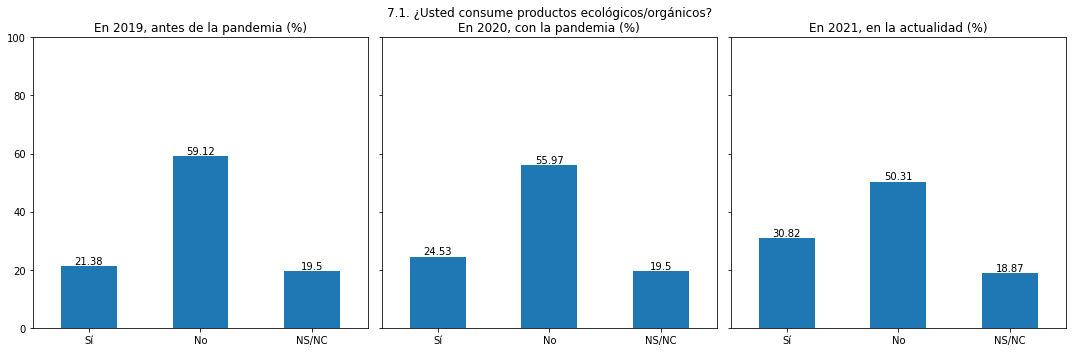

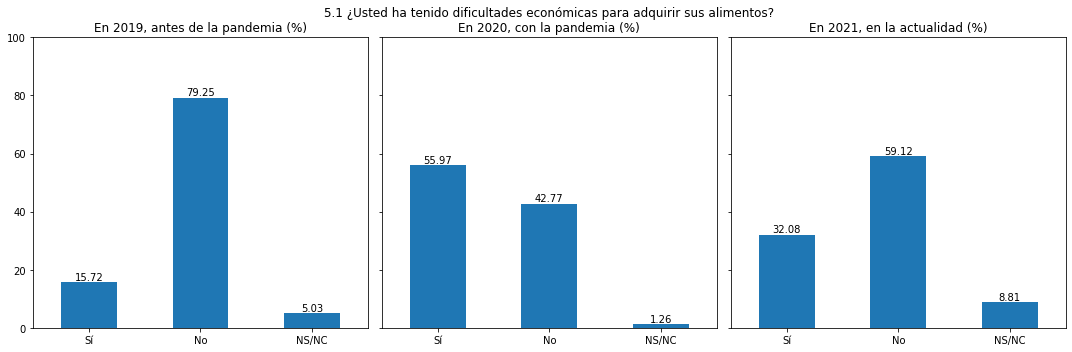

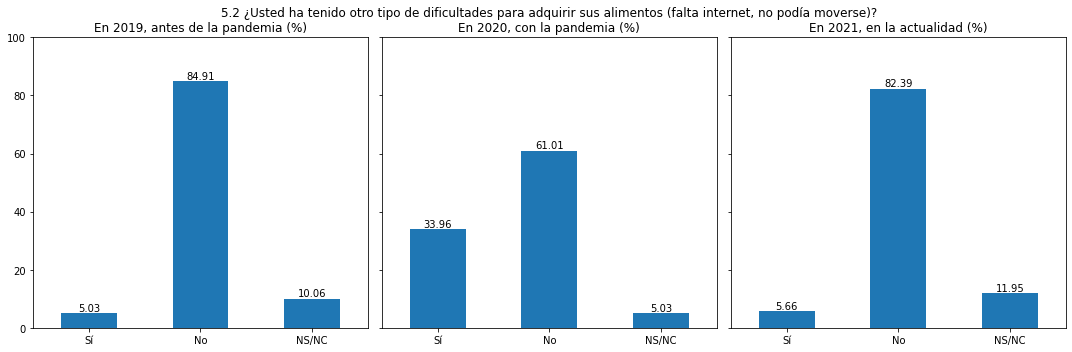

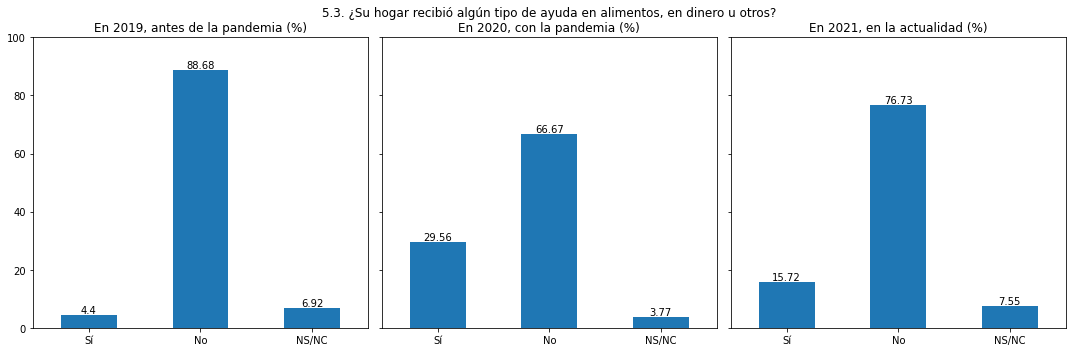

In [53]:
for cols in np.array(binarias).reshape(4,3):
    fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    for j, col in enumerate(cols):
        (new_df[col].value_counts(normalize=True)*100).round(2)[['Sí', 'No', 'NS/NC']].plot(kind='bar', rot=0, ylim=(0, 100), ax=axes[j])
        if j == 1:
            axes[j].set_title(invert_colnames_mapper[col].replace('*','') + ' (%)')
        else:
            axes[j].set_title(invert_colnames_mapper[col].split('*')[2] + ' (%)')
        
        axes[j].bar_label(axes[j].containers[0])
        
    plt.tight_layout()
    plt.savefig(f"outputs/bars/{'_'.join(cols[0].split('_')[:-1])}.png", dpi=300, bbox_inches='tight')
    plt.show()
    

In [ ]:
df['Zonas_Vecindarios'].value_counts()

In [ ]:
df_carabayllo = df[df['1.3.0. Distritos (Lima Y Quito)'] == 'Carabayllo']

In [ ]:
profile_carabayllo = ProfileReport(df_carabayllo, title="Reporte de Sondeo Rapido: Carabayllo, Lima")

In [ ]:
profile_carabayllo.to_file("reporte_sondeo_rapido_carabayllo_lima.html")

In [ ]:
df_pachacamac = df[df['1.3.0. Distritos (Lima Y Quito)'] == 'Pachacamac']

In [ ]:
profile_pachacamac = ProfileReport(df_pachacamac, title="Reporte de Sondeo Rapido: Pachacamac, Lima")

In [ ]:
profile_pachacamac.to_file("reporte_sondeo_rapido_pachacamac_lima.html")

In [ ]:
df_solana = df[df['1.3.0. Distritos (Lima Y Quito)'] == 'Solana']

In [ ]:
profile_solana = ProfileReport(df_solana, title="Reporte de Sondeo Rapido: Solana, Quito", minimal=True)

In [ ]:
profile_solana.to_file("reporte_sondeo_rapido_solana_quito.html")